We have devised a route as below:
The centre point is (52.368622, 4.890342).
This is located near Universiteit van Amsterdam, Spui, Centrum, Amsterdam, Noord-Holland, Nederland, 1012 XA, Nederland.
Start Centrality: 0.015727025393495603
End Centrality: 0.015173272456123193
Centre Centrality: 0.013659676830846233
The closest bus stop to the centre point is: (52.3694587, 4.8920866)
This is located near Rokin, Centrum, Amsterdam, Noord-Holland, Nederland, 1012 LA, Nederland.
The closest bus stop to the centre point is: (52.3678894, 4.8891545)
This is located near 419-1, Singel, Centrum, Amsterdam, Noord-Holland, Nederland, 1012 WP, Nederland.
There are 49 cafes and 154 restaurants within a 10min walk of the end point... enough choice for everyone!
For example, after attending the event, people could go to: Ponte Magro, Pasta Factory or Pho King.


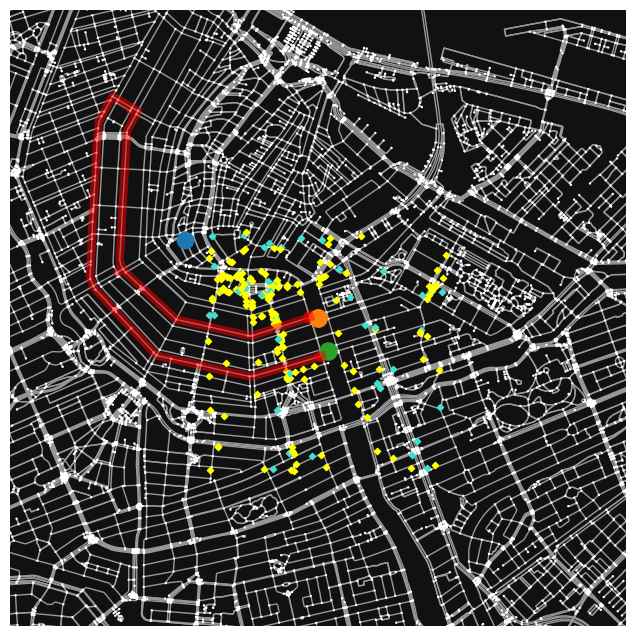

In [1]:
#OUR SWIMMING ROUTE

import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.distance import great_circle
import random


#To map out our swimming routes, we import the osmnx map of Amsterdam, which contains geo information on roads, amenities, transport links...
#After that, we input our coordinates.  start_p1 and end_p5 will be particularily important as they are the start and finish points.
G = (ox.graph_from_place('Amsterdam, Netherlands'))

#First half (2.5km)
start_p1 = (52.364504, 4.901791)
end_p1 = (52.366949, 4.884788)
end_p2 = (52.375386, 4.885902)
#Second half (2.5km)
end_p3 = (52.375999, 4.884249)
end_p4 = (52.366146, 4.882710)
end_p5 = (52.362747, 4.902612)

#We need to convert the coordinates into nodes to then be able to create paths that join them. 
#Instead of doing node + path manually each time, we make a function that does it for us! 
def make_route(point1, point2):
    nodes1 = ox.distance.nearest_nodes(G,point1[1],point1[0], return_dist=True)
    nodes2 = ox.distance.nearest_nodes(G,point2[1],point2[0], return_dist=True)
    path = ox.shortest_path(G, nodes1[0], nodes2[0])
    return path
    
#There were have it, our 5 separate paths, which we join together to map out the one total 5km route.
path1 = make_route(start_p1,end_p1)
path2 = make_route(end_p1,end_p2)
path3 = make_route(end_p2,end_p3)
path4 = make_route(end_p3,end_p4)
path5 = make_route(end_p4, end_p5)

total_path = path1 + path2[1:] + path3[1:] + path4[1:] + path5[1:]

#We can then define the boundaries of our graph, which we will continue building on and plot later.
pt = ox.graph_to_gdfs(G, edges=False).unary_union.centroid
bbox = ox.utils_geo.bbox_from_point(start_p1, dist=1800)

print(f"We have devised a route as below:")


#FINDING CENTRE
#To find the centre, we put all the coordinates in a list in order to filter through it in terms of latitude and longitude (x and y / 0 and 1)
total_coord = [
    (52.364504, 4.901791),
    (52.366949, 4.884788),
    (52.375386, 4.885902),
    (52.375999, 4.884249),
    (52.366146, 4.882710),
    (52.362747, 4.902612)
]

total_lat = 0
total_lon = 0

#With a small loop, we compile the latitude and longitudes into their respective totals. 
# From there we can do a simple calculation to find the coordinates of the centre point of the route. 
for lat, lon in total_coord:
    total_lat += lat
    total_lon += lon

av_lat = total_lat / len(total_coord)
av_lon = total_lon / len(total_coord)

centre_point = (round(av_lat,6), round(av_lon,6))

print (f"The centre point is {centre_point}.")

#WHAT ADDRESS IS IT AT
#As it is difficult to understand coordinates, we then translate those back into an address.
geolocator = Nominatim(user_agent="coordinateconverter")
centre_address = geolocator.reverse(centre_point, exactly_one=True)

print (f"This is located near {centre_address}.")



#CALCULATE CENTRALITY
#Closeness centrality measures how central a node is based on its proximity to other nodes. 
#This is a suitable choice as we are interested in finding nodes that are well-connected in terms of the shortest path distances. 
#As the previous function didn't return nodes but the completed paths, we have to quickly get the nodes for start, end and centre points.

start_node = ox.distance.nearest_nodes(G, start_p1[1], start_p1[0])
end_node= ox.distance.nearest_nodes(G,end_p5[1],end_p5[0])
centre_node= ox.distance.nearest_nodes(G,centre_point[1],centre_point[0])

#Once we have done that, we can easily calculate the centrality.
start_centrality = nx.closeness_centrality(G, u=start_node)
end_centrality = nx.closeness_centrality(G, u=end_node)
centre_centrality = nx.closeness_centrality(G, u=centre_node)

print("Start Centrality:", start_centrality)
print("End Centrality:", end_centrality)
print("Centre Centrality:", centre_centrality)


#CALCULATE NEAREST BUS STOP FROM ESMEE'S COORDINATES
#From the other jupyter workbook's script, we had a list of the four bus stops' coordinates within a small radius around the centre point.
bus_stops = [(52.3694587, 4.8920866),
(52.3697177, 4.892305),
(52.3662755, 4.8964231),
(52.3662374, 4.89311)
]

#We created a nice little loop comparing the distances to the central point for each bus stop coordinate
#With it, we find the stop closest to the centre point, which we then translate into an address.
closest_stop = None
min_distance = float('inf')

for stop in bus_stops:
    distance = great_circle(centre_point, stop).kilometers
    if distance < min_distance:
        min_distance = distance
        closest_stop = stop

print("The closest bus stop to the centre point is:", closest_stop)

geolocator = Nominatim(user_agent="coordinateconverter")
closest_stop_address = geolocator.reverse(closest_stop, exactly_one=True)

print (f"This is located near {closest_stop_address}.")


#CALCULATE NEAREST TRAM STOP FROM ESMEE'S COORDINATES
#From the other jupyter workbook's script, we had a list of the seven tram stops' coordinates within a small radius around the centre point.
tram_stops = [(52.3678894, 4.8891545),
(52.3566715, 4.8796365),
(52.3588611, 4.8812322),
(52.3746846, 4.8727694), 
(52.3743398, 4.8764506),
(52.3830358, 4.8820335),
(52.3651306, 4.9154802)
]

#We created a nice little loop comparing the distances to the central point for each tram stop coordinate
#With it, we find the stop closest to the centre point, which we then translate into an address.
closest_tstop = None
min_tdistance = float('inf')

for tstop in tram_stops:
    tdistance = great_circle(centre_point, tstop).kilometers
    if tdistance < min_tdistance:
        min_tdistance = tdistance
        closest_tstop = tstop

print("The closest bus stop to the centre point is:", closest_tstop)

tgeolocator = Nominatim(user_agent="coordinateconverter")
closest_tstop_address = geolocator.reverse(closest_tstop, exactly_one=True)

print (f"This is located near {closest_tstop_address}.")

#FIND RESTAURANTS AND CAFES NEAR FINISH LINE
#Finally, to identify the restaurants and cafes within a 10min walk (equivalent to about 700meter),
#we retrieve the relevant osmnx amenity data into a list, which we fill with the restaurant names.
#We can count the names of cafes and restaurants and even give some random sugestions to the end user :)

tags = {"amenity": ["restaurant","cafe"]}
amenities_list = ox.features.features_from_point(end_p5, tags, dist=700)
cafes = []
for index,row in amenities_list.iterrows():
    if row["amenity"]=="cafe":
        cafes.append(row["name"])


restau = []
for index,row in amenities_list.iterrows():
    if row["amenity"]=="restaurant":
        restau.append(row["name"])


print(f"There are {len(cafes)} cafes and {len(restau)} restaurants within a 10min walk of the end point... enough choice for everyone!")
random_restau = random.sample(restau, 3)
print(f"For example, after attending the event, people could go to: {random_restau[0]}, {random_restau[1]} or {random_restau[2]}.")

#PLOT EVERYTHING
#Now that we have filtered and found a lot of information, we can finally PLOT EVERYTHING!!
#This includes using simple plot_graph_route for our overal map data G, including our route
#But it also includes plotting the individual centralities, with sizes relative to their values
#And finally the amenities, displayed in a different shape and with their own colour to make the map more readable 
#This (hopefully) gives us a clear, useful output that the municipality can display to people attending the Swimming event!
fig, ax = ox.plot_graph_route(G,total_path, route_linewidth=6, node_size=3,  bbox = bbox, show=False, close=False)
ax.scatter(centre_point[1], centre_point[0], s=centre_centrality*10000)
ax.scatter(start_p1[1], start_p1[0], s=start_centrality*10000)
ax.scatter(end_p5[1], end_p5[0], s=end_centrality*10000)


for index, row in amenities_list.iterrows():
    if row["amenity"] == "restaurant":
        geom = row["geometry"]
        centroid = geom.centroid
        ax.scatter(centroid.x, centroid.y, color="yellow", marker="D", s=10)
    if row["amenity"] == "cafe":
        geom = row["geometry"]
        centroid = geom.centroid
        ax.scatter(centroid.x, centroid.y, color="turquoise", marker="D", s=10)


#ax.annotate("Start", (start_p1[1], start_p1[0]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
#ax.annotate("End", (end_p5[1], end_p5[0]), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8)
#ax.annotate("Center", (centre_point[1], centre_point[0]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.show()




